# Prepare Data for Processing

In [1]:
# Load libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


In [2]:
# Load Data into Pandas DataFrame
train = pd.read_csv("/kaggle/input/spaceship-titanic/train.csv")
test=pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')
train.head(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True


In [3]:
print("Train shape: ",train.shape,"Test shape:",test.shape)

Train shape:  (8693, 14) Test shape: (4277, 13)


In [4]:
# List column names
print("Train columns: \n",train.columns,"\n\n","Test columns: \n",test.columns)


Train columns: 
 Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object') 

 Test columns: 
 Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name'],
      dtype='object')


In [5]:
# List column data types
print("Train columns: \n",train.dtypes,"\n\n","Test columns: \n",test.dtypes)

Train columns: 
 PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object 

 Test columns: 
 PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
dtype: object


In [6]:
# Count of unique values
print("Train unique values: \n",train.nunique(),"\n\n","Test unique values: \n", test.nunique())

Train unique values: 
 PassengerId     8693
HomePlanet         3
CryoSleep          2
Cabin           6560
Destination        3
Age               80
VIP                2
RoomService     1273
FoodCourt       1507
ShoppingMall    1115
Spa             1327
VRDeck          1306
Name            8473
Transported        2
dtype: int64 

 Test unique values: 
 PassengerId     4277
HomePlanet         3
CryoSleep          2
Cabin           3265
Destination        3
Age               79
VIP                2
RoomService      842
FoodCourt        902
ShoppingMall     715
Spa              833
VRDeck           796
Name            4176
dtype: int64


In [7]:
# List of unique values 'HomePlanet'
print("Train distinct values: \n",train['HomePlanet'].unique(),"\n\n","Test distinct values: \n",  test['HomePlanet'].unique())

Train distinct values: 
 ['Europa' 'Earth' 'Mars' nan] 

 Test distinct values: 
 ['Earth' 'Europa' 'Mars' nan]


In [8]:
# List of unique values 'Destination'
print("Train distinct values: \n",train['Destination'].unique(),"\n\n","Test distinct values: \n",  test['Destination'].unique())

Train distinct values: 
 ['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e' nan] 

 Test distinct values: 
 ['TRAPPIST-1e' '55 Cancri e' 'PSO J318.5-22' nan]


**Transformations to Numerical for ease of Modeling**
* PassengerId      object
* HomePlanet       object  - 3 unique values. Convert to integer
* CryoSleep        object  - Values are False/True convert to int64 0/1
* Cabin            object  - Too many unique values, one hot encoding will not work
* Destination      object  - 3 unique values. Convert to integer
* Age             float64
* VIP              object  - Values are False/True convert to int64 0/1
* RoomService     float64
* FoodCourt       float64
* ShoppingMall    float64
* Spa             float64
* VRDeck          float64
* Name             object
* Transported        bool  - Values are False/True convert to int64 0/1

# Process Data for Analysis

In [9]:
# Check for duplicate Ids
# Train
idsUnique = len(set(train.PassengerId))
idsTotal = train.shape[0]
idsDupli = idsTotal - idsUnique
print("Train: There are " + str(idsDupli) + " duplicate IDs for " + str(idsTotal) + " total entries")

# Test
idsUnique = len(set(test.PassengerId))
idsTotal = test.shape[0]
idsDupli = idsTotal - idsUnique
print("Test: There are " + str(idsDupli) + " duplicate IDs for " + str(idsTotal) + " total entries")

Train: There are 0 duplicate IDs for 8693 total entries
Test: There are 0 duplicate IDs for 4277 total entries


In [10]:
# Check for missing values
# Train
train_missing_val_count = (train.isnull().sum())
# Test
test_missing_val_count = (test.isnull().sum())
print("Train missing values: \n",train_missing_val_count[train_missing_val_count>0],"\n\n","Test missing values: \n",  test_missing_val_count[test_missing_val_count>0])

Train missing values: 
 HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
dtype: int64 

 Test missing values: 
 HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64


In [11]:
# Fill missing values, ffill: propagate last valid observation forward
# Train
train = train.fillna(method='ffill')
# Test
test = test.fillna(method='ffill')

In [12]:
# Confirm no missing values
# Train
train_missing_val_count = (train.isnull().sum())
# Test
test_missing_val_count = (test.isnull().sum())
print("Train missing values: \n",train_missing_val_count[train_missing_val_count>0],"\n\n","Test missing values: \n",  test_missing_val_count[test_missing_val_count>0])

Train missing values: 
 Series([], dtype: int64) 

 Test missing values: 
 Series([], dtype: int64)


In [13]:
# Transform False/True Data to 0/1
#df['col1'] = df['col1'].astype(int)
#Train
train['CryoSleep']=train['CryoSleep'].astype(int)
train['VIP']=train['VIP'].astype(int)
train['Transported']=train['Transported'].astype(int)
#Test
test['CryoSleep']=test['CryoSleep'].astype(int)
test['VIP']=test['VIP'].astype(int)

In [14]:
# Transform categorical data with 3 values to 0/1/2
#df['col1'] = df['col1'].replace({'A': 0, 'B': 1, 'C': 2})
#['Europa', 'Earth', 'Mars'] ['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e']
# Train
train['HomePlanet']=train['HomePlanet'].replace({'Europa': 0, 'Earth': 1, 'Mars': 2})
train['Destination']=train['Destination'].replace({'TRAPPIST-1e': 0, 'PSO J318.5-22': 1, '55 Cancri e': 2})
# Test
test['HomePlanet']=test['HomePlanet'].replace({'Europa': 0, 'Earth': 1, 'Mars': 2})
test['Destination']=test['Destination'].replace({'TRAPPIST-1e': 0, 'PSO J318.5-22': 1, '55 Cancri e': 2})

In [15]:
# Cabin - The cabin number where the passenger is staying. 
#Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
#Split into three fields for deck, num and side
#df[['col1', 'col2', 'col3']] = df['data'].str.split('/', n=2, expand=True)
train[['Cabin_deck','Cabin_num','Cabin_side']]= train['Cabin'].str.split('/', n=2, expand=True)
print (train['Cabin_deck'].unique(), train['Cabin_side'].unique())
test[['Cabin_deck','Cabin_num','Cabin_side']]= test['Cabin'].str.split('/', n=2, expand=True)
print (test['Cabin_deck'].unique(), test['Cabin_side'].unique())

train['Cabin_deck']=train['Cabin_deck'].replace({'A': 1, 'B': 2, 'C':3, 'D':4, 'E':5, 'F':6, 'G':7, 'T':8})
train['Cabin_side']=train['Cabin_side'].replace({'P': 0, 'S': 1})
train['Cabin_num']=train['Cabin_num'].astype(int)

test['Cabin_deck']=test['Cabin_deck'].replace({'A': 0, 'B': 1, 'C':2, 'D':3, 'E':4, 'F':5, 'G':6, 'T':7})
test['Cabin_side']=test['Cabin_side'].replace({'P': 0, 'S': 1})
test['Cabin_num']=test['Cabin_num'].astype(int)



['B' 'F' 'A' 'G' 'E' 'D' 'C' 'T'] ['P' 'S']
['G' 'F' 'C' 'B' 'D' 'E' 'A' 'T'] ['S' 'P']


In [16]:
# PassengerId - A unique Id for each passenger. 
#Each Id takes the form gggg_pp where gggg indicates a group the passenger 
#is travelling with and pp is their number within the group. 
#People in a group are often family members, but not always.
train[['gggg','pp']] = train['PassengerId'].str.split('_', expand=True)
train['gggg']= train['gggg'].astype(int)
train['pp']= train['pp'].astype(int)

test[['gggg','pp']] = test['PassengerId'].str.split('_', expand=True)
test['gggg']= test['gggg'].astype(int)
test['pp']= test['pp'].astype(int)

In [17]:
#Split Name into First and Last
train[['First_Name','Last_Name']]=train['Name'].str.split(' ', expand=True)
test[['First_Name','Last_Name']]=test['Name'].str.split(' ', expand=True)

In [18]:
#We can't use one-hot encoding for First Name and Last Name as the test data 
#may have new First Name and Last Name that the model has not seen before
train['First_Name_Initial']=train['First_Name'].str[0]
train['First_Name_Initial']= train['First_Name_Initial'].map(
        {'A':1, 'B': 2, 'C':3,'D':4, 'E':5, 'F':6, 'G':7,
         'H':8, 'I':9, 'J':10,'K':11, 'L':12, 'M':13, 'N':14,
        'O':15, 'P':16, 'Q':17,'R':18, 'S':19, 'T':20, 'U':21,
        'V':22, 'W':23, 'X':24,'Y':25, 'Z':26}
    )
test['First_Name_Initial']=test['First_Name'].str[0]
test['First_Name_Initial']= test['First_Name_Initial'].map(
        {'A':1, 'B': 2, 'C':3,'D':4, 'E':5, 'F':6, 'G':7,
         'H':8, 'I':9, 'J':10,'K':11, 'L':12, 'M':13, 'N':14,
        'O':15, 'P':16, 'Q':17,'R':18, 'S':19, 'T':20, 'U':21,
        'V':22, 'W':23, 'X':24,'Y':25, 'Z':26}
    )

In [19]:
train.dtypes

PassengerId            object
HomePlanet              int64
CryoSleep               int64
Cabin                  object
Destination             int64
Age                   float64
VIP                     int64
RoomService           float64
FoodCourt             float64
ShoppingMall          float64
Spa                   float64
VRDeck                float64
Name                   object
Transported             int64
Cabin_deck              int64
Cabin_num               int64
Cabin_side              int64
gggg                    int64
pp                      int64
First_Name             object
Last_Name              object
First_Name_Initial      int64
dtype: object

> <H3>Feature Crosses</H3>
Crossing features to locate additional information

In [20]:
#Would crosses of the features contain additional information
train['Cabin_deck_x_gggg']=train['Cabin_deck']*train['gggg']
test['Cabin_deck_x_gggg']=test['Cabin_deck']*test['gggg']

In [21]:
#Would crosses of the features contain additional information
train['Destination_x_CryoSleep']=train['Destination']*train['CryoSleep']
test['Destination_x_CryoSleep']=test['Destination']*test['CryoSleep']

In [22]:
# Find the most important numerical features relative to target using pandas corr function
corr = train.corr()
corr.sort_values(["Transported"], ascending = False, inplace = True)
print(corr.Transported)

Transported                1.000000
CryoSleep                  0.456062
Destination_x_CryoSleep    0.275828
Destination                0.108732
Cabin_side                 0.103142
pp                         0.066390
FoodCourt                  0.046016
gggg                       0.021491
ShoppingMall               0.010163
First_Name_Initial        -0.003140
Cabin_deck_x_gggg         -0.034508
VIP                       -0.034560
Cabin_num                 -0.047249
Age                       -0.074233
HomePlanet                -0.103718
Cabin_deck                -0.114933
VRDeck                    -0.204798
Spa                       -0.217188
RoomService               -0.241271
Name: Transported, dtype: float64


Very little correlation with most numeric features.

In [23]:
# Separate numerical features and categorical features. Target is bool.
# Train
categorical_features = train.select_dtypes(include = ["object"]).columns
numerical_features = train.select_dtypes(include = ["int64", "float64"]).columns
numerical_features = numerical_features.drop('Transported')
print("Numerical features : ", str(len(numerical_features)) ,numerical_features)
print("Categorical features : ", str(len(categorical_features)),categorical_features)
train_num = train[numerical_features]
train_cat = train[categorical_features]
# Test
test_num = test[numerical_features]
test_cat = test[categorical_features]


Numerical features :  18 Index(['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Cabin_deck', 'Cabin_num',
       'Cabin_side', 'gggg', 'pp', 'First_Name_Initial', 'Cabin_deck_x_gggg',
       'Destination_x_CryoSleep'],
      dtype='object')
Categorical features :  5 Index(['PassengerId', 'Cabin', 'Name', 'First_Name', 'Last_Name'], dtype='object')


There are too many categories so one-hot encoding will not work, so commented out the one-hot encoding section. Instead splitting the Cabin data into subcomponents.

 Train unique values:
Cabin           6560
Name            8473

 Test unique values: 
Cabin           3265

In [24]:
# Create dummy features for categorical values via one-hot encoding
# Train
'''
print("NAs for categorical features in train : " + str(train_cat.isnull().values.sum()))
train_cat = pd.get_dummies(train_cat)
print("Remaining NAs for categorical features in train : " + str(train_cat.isnull().values.sum()))
# Test
print("NAs for categorical features in test : " + str(test_cat.isnull().values.sum()))
test_cat = pd.get_dummies(test_cat)
print("Remaining NAs for categorical features in test : " + str(test_cat.isnull().values.sum()))
'''

'\nprint("NAs for categorical features in train : " + str(train_cat.isnull().values.sum()))\ntrain_cat = pd.get_dummies(train_cat)\nprint("Remaining NAs for categorical features in train : " + str(train_cat.isnull().values.sum()))\n# Test\nprint("NAs for categorical features in test : " + str(test_cat.isnull().values.sum()))\ntest_cat = pd.get_dummies(test_cat)\nprint("Remaining NAs for categorical features in test : " + str(test_cat.isnull().values.sum()))\n'

In [25]:
train.head(11)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,Cabin_deck,Cabin_num,Cabin_side,gggg,pp,First_Name,Last_Name,First_Name_Initial,Cabin_deck_x_gggg,Destination_x_CryoSleep
0,0001_01,0,0,B/0/P,0,39.0,0,0.0,0.0,0.0,...,2,0,0,1,1,Maham,Ofracculy,13,2,0
1,0002_01,1,0,F/0/S,0,24.0,0,109.0,9.0,25.0,...,6,0,1,2,1,Juanna,Vines,10,12,0
2,0003_01,0,0,A/0/S,0,58.0,1,43.0,3576.0,0.0,...,1,0,1,3,1,Altark,Susent,1,3,0
3,0003_02,0,0,A/0/S,0,33.0,0,0.0,1283.0,371.0,...,1,0,1,3,2,Solam,Susent,19,3,0
4,0004_01,1,0,F/1/S,0,16.0,0,303.0,70.0,151.0,...,6,1,1,4,1,Willy,Santantines,23,24,0
5,0005_01,1,0,F/0/P,1,44.0,0,0.0,483.0,0.0,...,6,0,0,5,1,Sandie,Hinetthews,19,30,0
6,0006_01,1,0,F/2/S,0,26.0,0,42.0,1539.0,3.0,...,6,2,1,6,1,Billex,Jacostaffey,2,36,0
7,0006_02,1,1,G/0/S,0,28.0,0,0.0,0.0,0.0,...,7,0,1,6,2,Candra,Jacostaffey,3,42,0
8,0007_01,1,0,F/3/S,0,35.0,0,0.0,785.0,17.0,...,6,3,1,7,1,Andona,Beston,1,42,0
9,0008_01,0,1,B/1/P,2,14.0,0,0.0,0.0,0.0,...,2,1,0,8,1,Erraiam,Flatic,5,16,2


In [26]:
train.tail(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,Cabin_deck,Cabin_num,Cabin_side,gggg,pp,First_Name,Last_Name,First_Name_Initial,Cabin_deck_x_gggg,Destination_x_CryoSleep
8683,9272_02,1,0,F/1894/P,0,21.0,0,86.0,3.0,149.0,...,6,1894,0,9272,2,Gordo,Simson,7,55632,0
8684,9274_01,1,1,G/1508/P,0,23.0,0,0.0,0.0,0.0,...,7,1508,0,9274,1,Chelsa,Bullisey,3,64918,0
8685,9275_01,0,0,A/97/P,0,0.0,0,0.0,0.0,0.0,...,1,97,0,9275,1,Polaton,Conable,16,9275,0
8686,9275_02,0,0,A/97/P,0,32.0,0,1.0,1146.0,0.0,...,1,97,0,9275,2,Diram,Conable,4,9275,0
8687,9275_03,0,0,A/97/P,0,30.0,0,0.0,3208.0,0.0,...,1,97,0,9275,3,Atlasym,Conable,1,9275,0
8688,9276_01,0,0,A/98/P,2,41.0,1,0.0,6819.0,0.0,...,1,98,0,9276,1,Gravior,Noxnuther,7,9276,0
8689,9278_01,1,1,G/1499/S,1,18.0,0,0.0,0.0,0.0,...,7,1499,1,9278,1,Kurta,Mondalley,11,64946,1
8690,9279_01,1,0,G/1500/S,0,26.0,0,0.0,0.0,1872.0,...,7,1500,1,9279,1,Fayey,Connon,6,64953,0
8691,9280_01,0,0,E/608/S,2,32.0,0,0.0,1049.0,0.0,...,5,608,1,9280,1,Celeon,Hontichre,3,46400,0
8692,9280_02,0,0,E/608/S,0,44.0,0,126.0,4688.0,0.0,...,5,608,1,9280,2,Propsh,Hontichre,16,46400,0


# Analyze - Create Model

In [27]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

# Definitions
pd.set_option('display.float_format', lambda x: '%.3f' % x)
%matplotlib inline
#njobs = 4

In [28]:
# Define features 
# Join categorical and numerical features
#X = pd.concat([train_num, train_cat], axis = 1)
X=train_num
print("New number of features : " + str(X.shape[1]))

New number of features : 18


In [29]:
#Define label
y = train.Transported
print(y)

0       0
1       1
2       0
3       0
4       1
       ..
8688    0
8689    0
8690    1
8691    0
8692    1
Name: Transported, Length: 8693, dtype: int64


In [30]:
# Partition the dataset into train + validation sets
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size = 0.3, random_state = 0)
print("X_train : " + str(X_train.shape))
print("X_validation : " + str(X_validation.shape))
print("y_train : " + str(y_train.shape))
print("y_validation : " + str(y_validation.shape))

X_train : (6085, 18)
X_validation : (2608, 18)
y_train : (6085,)
y_validation : (2608,)


In [31]:
y_train.head()

7289    0
2709    1
6803    0
3731    1
6333    0
Name: Transported, dtype: int64

Using the model from the course (https://www.kaggle.com/learn/intro-to-deep-learning)

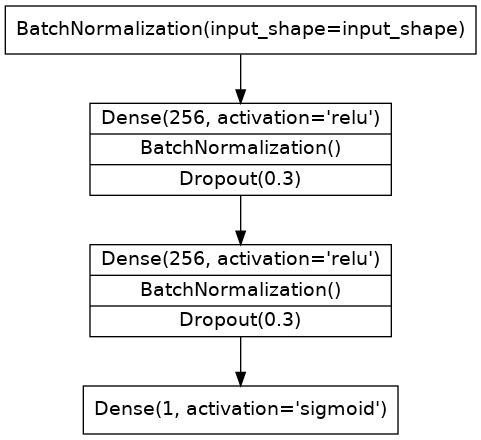

In [32]:
# Input shape
input_shape = [X_train.shape[1]]

In [33]:
# define the model given in the diagram
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.BatchNormalization(input_shape=input_shape),    
    layers.Dense(units=256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),#tried values 0.2,0.3,0.4,0.5. Graphs converged for 0.5
    layers.Dense(units=256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(units=1,activation='sigmoid')
])


Epoch 1/100
24/24 [==============================] - 3s 24ms/step - loss: 0.6703 - binary_accuracy: 0.7137 - val_loss: 0.6095 - val_binary_accuracy: 0.6181
Epoch 2/100
24/24 [==============================] - 0s 13ms/step - loss: 0.5715 - binary_accuracy: 0.7426 - val_loss: 0.5528 - val_binary_accuracy: 0.6971
Epoch 3/100
24/24 [==============================] - 0s 15ms/step - loss: 0.5309 - binary_accuracy: 0.7550 - val_loss: 0.5346 - val_binary_accuracy: 0.7696
Epoch 4/100
24/24 [==============================] - 0s 14ms/step - loss: 0.5071 - binary_accuracy: 0.7591 - val_loss: 0.5184 - val_binary_accuracy: 0.7772
Epoch 5/100
24/24 [==============================] - 0s 13ms/step - loss: 0.4912 - binary_accuracy: 0.7675 - val_loss: 0.5104 - val_binary_accuracy: 0.7799
Epoch 6/100
24/24 [==============================] - 0s 14ms/step - loss: 0.4867 - binary_accuracy: 0.7730 - val_loss: 0.4952 - val_binary_accuracy: 0.7834
Epoch 7/100
24/24 [==============================] - 0s 13ms/ste

<AxesSubplot:title={'center':'Accuracy'}>

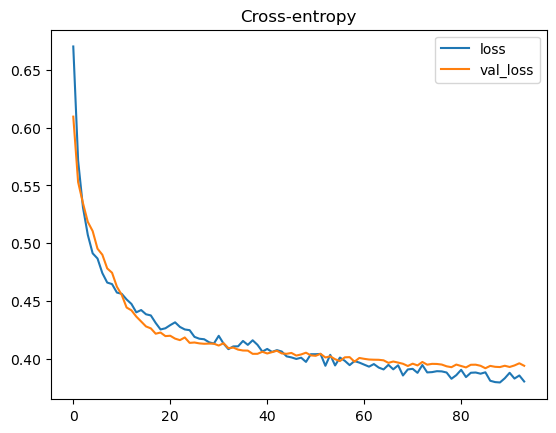

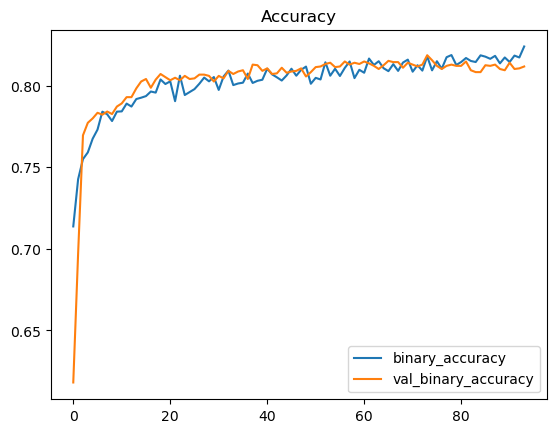

In [34]:
from keras.optimizers import Adam
# Compile model
model.compile(
    optimizer='adam', #Tested optimizers Adadelta, Adamax, Nadam, Ftrl, RMSprop
                        #optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy', #Tested loss='poisson',
    metrics=['binary_accuracy'],
)

# Setup early stopping
early_stopping = keras.callbacks.EarlyStopping(
    patience=15,
    min_delta=0.001,
    restore_best_weights=True,
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_validation, y_validation),
    batch_size=256,
    epochs=100,
    callbacks=[early_stopping],
)

#The fit method keeps a record of the loss produced during training in a History object. 

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot(title="Accuracy")

In [35]:
history_df.head()

,loss,binary_accuracy,val_loss,val_binary_accuracy
0,0.670,0.714,0.610,0.618
1,0.571,0.743,0.553,0.697
2,0.531,0.755,0.535,0.770
3,0.507,0.759,0.518,0.777
4,0.491,0.767,0.510,0.780


# Share - Create Submission

In [36]:
# Join categorical and numerical features
#X_test = pd.concat([test_num, test_cat], axis = 1)
X_test = test_num
print("New number of features : " + str(X_test.shape[1]))

New number of features : 18


In [37]:
X_test.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cabin_deck,Cabin_num,Cabin_side,gggg,pp,First_Name_Initial,Cabin_deck_x_gggg,Destination_x_CryoSleep
0,1,1,0,27.000,0,0.000,0.000,0.000,0.000,0.000,6,3,1,13,1,14,78,0
1,1,0,0,19.000,0,0.000,9.000,0.000,2823.000,0.000,5,4,1,18,1,12,90,0
2,0,1,2,31.000,0,0.000,0.000,0.000,0.000,0.000,2,0,1,19,1,19,38,2
3,0,0,0,38.000,0,0.000,6652.000,0.000,181.000,585.000,2,1,1,21,1,13,42,0
4,1,0,0,20.000,0,10.000,0.000,635.000,0.000,0.000,5,5,1,23,1,2,115,0


In [38]:
# Predict
y_test_pred = model.predict(X_test)
print(y_test_pred)

134/134 [==============================] - 0s 2ms/step
[[0.54239255]
 [0.06209651]
 [0.9918541 ]
 ...
 [0.9489332 ]
 [0.85082626]
 [0.5104641 ]]


In [39]:
y_test_pred[1]
len(y_test_pred)

4277

In [40]:
# Convert the prediction probabilities to bool
threshold=0.5
y_test_bool=(y_test_pred > threshold) 
y_test_bool=y_test_bool.transpose()
print(y_test_bool)


[[ True False  True ...  True  True  True]]


In [41]:
#len(test.PassengerId)
len(y_test_bool[0])


4277

In [42]:
# Output

output = pd.DataFrame({'PassengerId': test.PassengerId, 'Transported': y_test_bool[0]})

#output['Transported']=output['Transported'].astype(bool)
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")


Your submission was successfully saved!
